<a href="https://colab.research.google.com/github/Yashs02-code/AI-Trip-Planner/blob/main/Copy_of_Final_Space_Mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🔭 Project Title : Space Mission Analysis 🚀**\:

# 🔍 **Data** **Cleaning** **&** **Data** **Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Blues_d")

In [ ]:
df= pd.read_csv("/content/space_mission_data.csv")

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
# Step 1.2: Data Preprocessing

# Convert 'Date' to datetime and extract time features
df['Parsed_Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Parsed_Date'].dt.year
df['Month'] = df['Parsed_Date'].dt.month

# Keep full 'Detail' (Rocket + Payload) inside Rocket_Model column
df['Rocket_Model'] = df['Detail'].str.strip()

# Extract Country from Location
df['Country'] = df['Location'].str.split(',').str[-1].str.strip()

# Extract Launch Site (everything except the country)
df['Launch_Site'] = df['Location'].apply(lambda loc: ", ".join(loc.split(", ")[:-1]))

# Clean 'Price' column (convert to numeric)
df['Price'] = pd.to_numeric(
    df['Price'].astype(str).str.replace(',', ''), errors='coerce'
)


In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Parsed_Date,Year,Month,Rocket_Model,Country,Launch_Site
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,2020.0,8.0,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,USA,"LC-39A, Kennedy Space Center, Florida"
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020.0,8.0,Long March 2D | Gaofen-9 04 & Q-SAT,China,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce..."
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020.0,8.0,Starship Prototype | 150 Meter Hop,USA,"Pad A, Boca Chica, Texas"
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30 21:25:00+00:00,2020.0,7.0,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Kazakhstan,"Site 200/39, Baikonur Cosmodrome"
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30 11:50:00+00:00,2020.0,7.0,Atlas V 541 | Perseverance,USA,"SLC-41, Cape Canaveral AFS, Florida"


In [ ]:
#1.3 Drop unneeded columns
df.drop(['Detail', 'Date','Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [ ]:
df.head()

,Organisation,Location,Rocket_Status,Price,Mission_Status,Parsed_Date,Year,Month,Rocket_Model,Country,Launch_Site
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",StatusActive,50.00,Success,2020-08-07 05:12:00+00:00,2020.0,8.0,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,USA,"LC-39A, Kennedy Space Center, Florida"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020.0,8.0,Long March 2D | Gaofen-9 04 & Q-SAT,China,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce..."
2,SpaceX,"Pad A, Boca Chica, Texas, USA",StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020.0,8.0,Starship Prototype | 150 Meter Hop,USA,"Pad A, Boca Chica, Texas"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",StatusActive,65.00,Success,2020-07-30 21:25:00+00:00,2020.0,7.0,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Kazakhstan,"Site 200/39, Baikonur Cosmodrome"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",StatusActive,145.00,Success,2020-07-30 11:50:00+00:00,2020.0,7.0,Atlas V 541 | Perseverance,USA,"SLC-41, Cape Canaveral AFS, Florida"


In [ ]:
print('Number of duplicate rows: ',df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('Number of duplicate rows: ',df.duplicated().sum())

Number of duplicate rows:  12
Number of duplicate rows:  0


In [ ]:
#2.3 Reorder columns for clarity
df = df[['Organisation', 'Country', 'Location', 'Launch_Site', 'Parsed_Date', 'Year', 'Month','Rocket_Model',
           'Rocket_Status', 'Mission_Status', 'Price']]
df.head()

,Organisation,Country,Location,Launch_Site,Parsed_Date,Year,Month,Rocket_Model,Rocket_Status,Mission_Status,Price
0,SpaceX,USA,"LC-39A, Kennedy Space Center, Florida, USA","LC-39A, Kennedy Space Center, Florida",2020-08-07 05:12:00+00:00,2020.0,8.0,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,50.00
1,CASC,China,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,2020.0,8.0,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,29.75
2,SpaceX,USA,"Pad A, Boca Chica, Texas, USA","Pad A, Boca Chica, Texas",2020-08-04 23:57:00+00:00,2020.0,8.0,Starship Prototype | 150 Meter Hop,StatusActive,Success,NaN
3,Roscosmos,Kazakhstan,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Site 200/39, Baikonur Cosmodrome",2020-07-30 21:25:00+00:00,2020.0,7.0,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,65.00
4,ULA,USA,"SLC-41, Cape Canaveral AFS, Florida, USA","SLC-41, Cape Canaveral AFS, Florida",2020-07-30 11:50:00+00:00,2020.0,7.0,Atlas V 541 | Perseverance,StatusActive,Success,145.00


In [ ]:
print(df['Price'])


0        50.00
1        29.75
2          NaN
3        65.00
4       145.00
         ...  
4319       NaN
4320       NaN
4321       NaN
4322       NaN
4323       NaN
Name: Price, Length: 4312, dtype: float64


In [ ]:
# save the preprocessed dataframe to a new CSV file (Optional)
df.to_csv('preprocessed_data.csv', index=False)

# 📈 **Data Visualization**

# **🚀 SAUD**



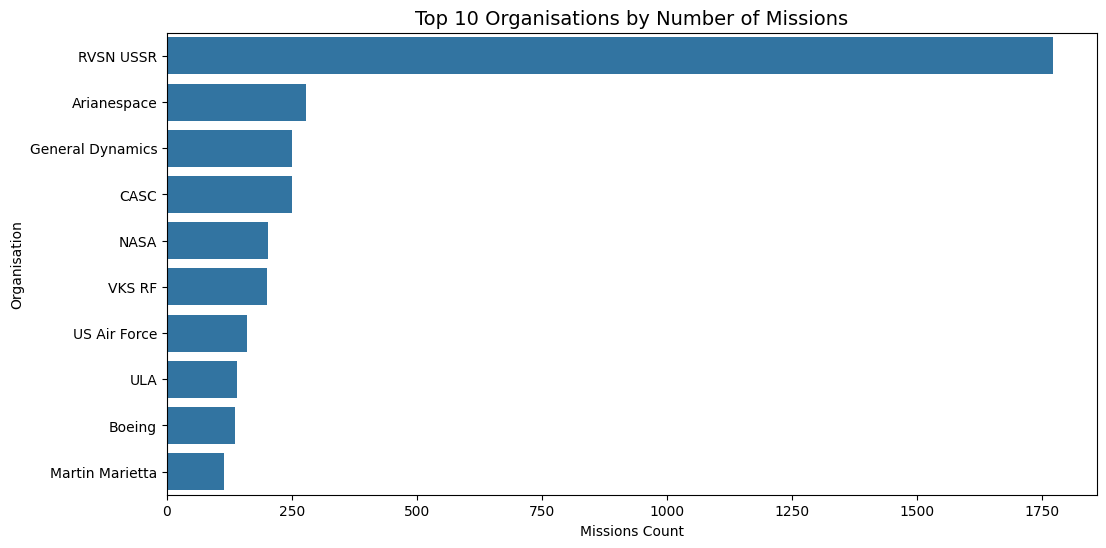

In [ ]:
# --- Q1: Organisations with most missions ---
plt.figure(figsize=(12,6))
sns.barplot(y=df['Organisation'].value_counts().head(10).index,
            x=df['Organisation'].value_counts().head(10).values)
plt.title("Top 10 Organisations by Number of Missions", fontsize=14)
plt.xlabel("Missions Count")
plt.ylabel("Organisation")
plt.show()

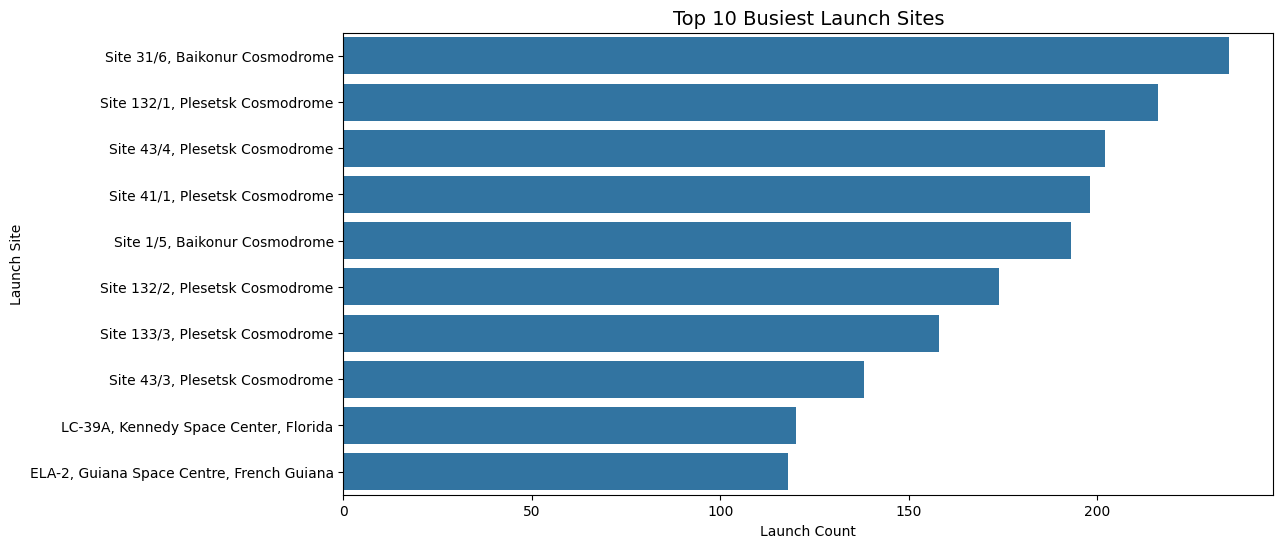

In [ ]:
# --- Q2: Busiest Launch Sites ---
plt.figure(figsize=(12,6))
sns.barplot(y=df['Launch_Site'].value_counts().head(10).index,
            x=df['Launch_Site'].value_counts().head(10).values)
plt.title("Top 10 Busiest Launch Sites", fontsize=14)
plt.xlabel("Launch Count")
plt.ylabel("Launch Site")
plt.show()

# **🚀 ANISHKA**



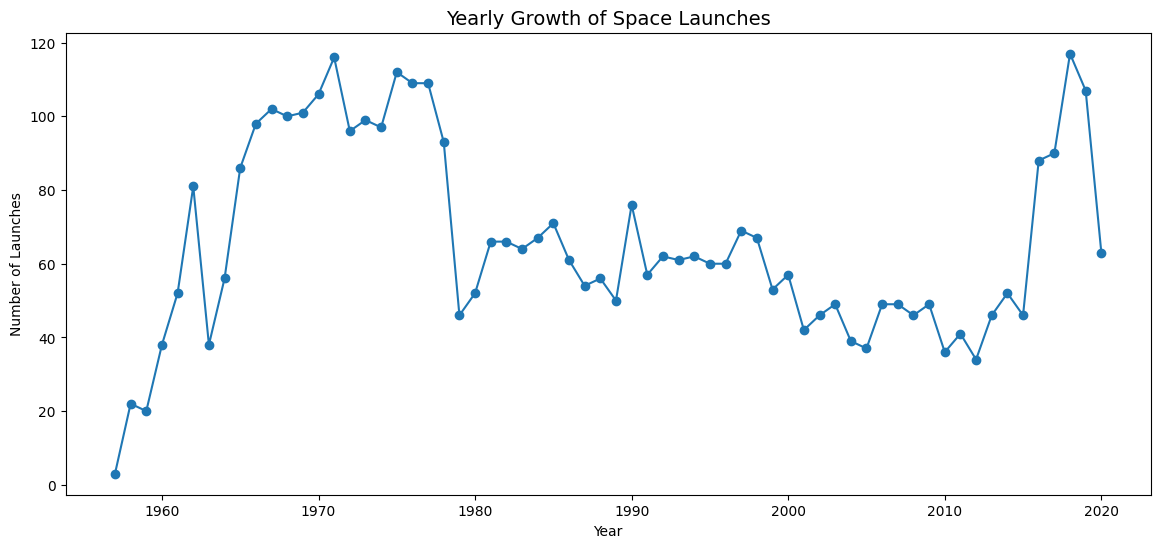

In [ ]:
# --- Q3: Launches Over Time ---
plt.figure(figsize=(14,6))
df.groupby('Year').size().plot(kind='line', marker='o')
plt.title("Yearly Growth of Space Launches", fontsize=14)
plt.ylabel("Number of Launches")
plt.xlabel("Year")
plt.show()

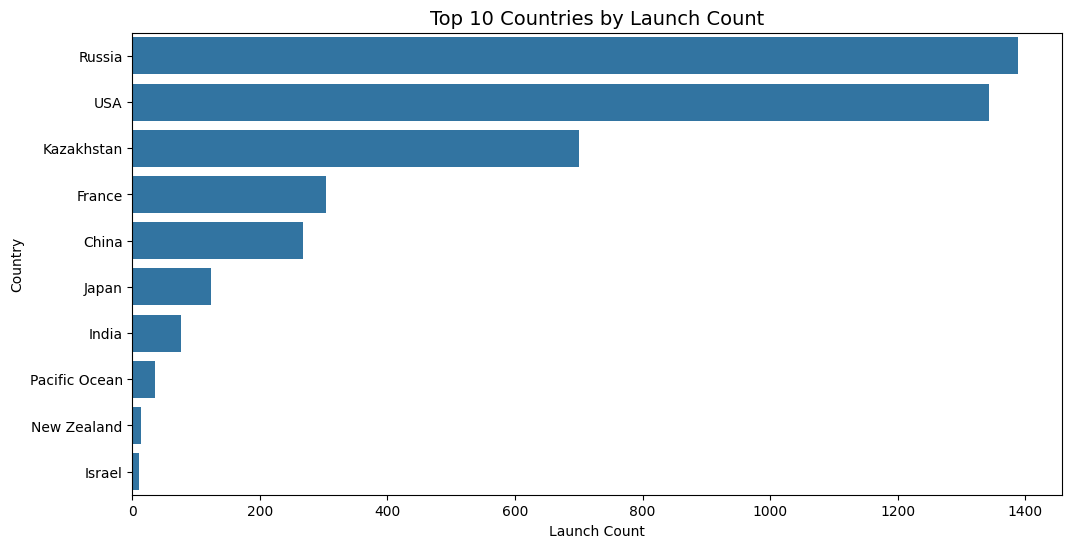

In [ ]:
# --- Q4: Leading Countries in Space Missions ---
plt.figure(figsize=(12,6))
sns.barplot(y=df['Country'].value_counts().head(10).index,
            x=df['Country'].value_counts().head(10).values)
plt.title("Top 10 Countries by Launch Count", fontsize=14)
plt.xlabel("Launch Count")
plt.ylabel("Country")
plt.show()

# **🚀 YASH**


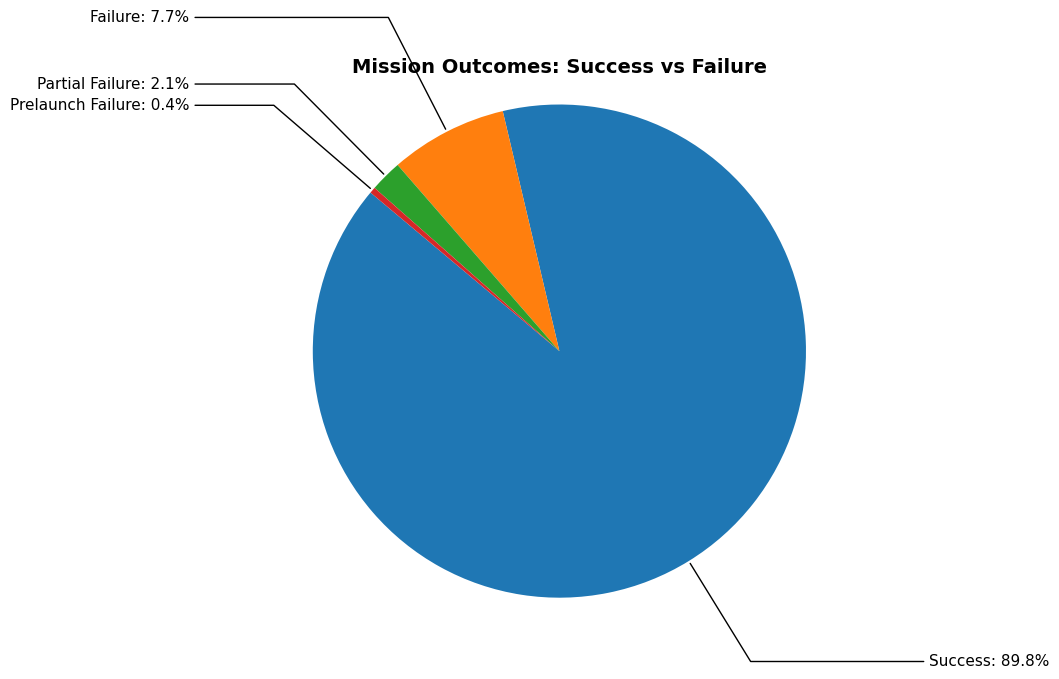

In [ ]:


# Data
labels = ["Success", "Failure", "Partial Failure", "Prelaunch Failure"]
data = [89.8, 7.7, 2.1, 0.4]

# Pie chart (basic wedges)
fig, ax = plt.subplots(figsize=(7,7))
wedges, texts = ax.pie(
    data,
    startangle=140
)

# Add custom labels + leader lines (all outside with % values)
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    ang = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    ha = "left" if x > 0 else "right"
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(f"{label}: {data[i]}%",
                xy=(x, y),
                xytext=(1.5*np.sign(x), 1.5*y),
                horizontalalignment=ha,
                fontsize=11,
                arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle))

# Title
ax.set_title("Mission Outcomes: Success vs Failure", fontsize=14, fontweight='bold')
ax.axis('equal')
plt.show()

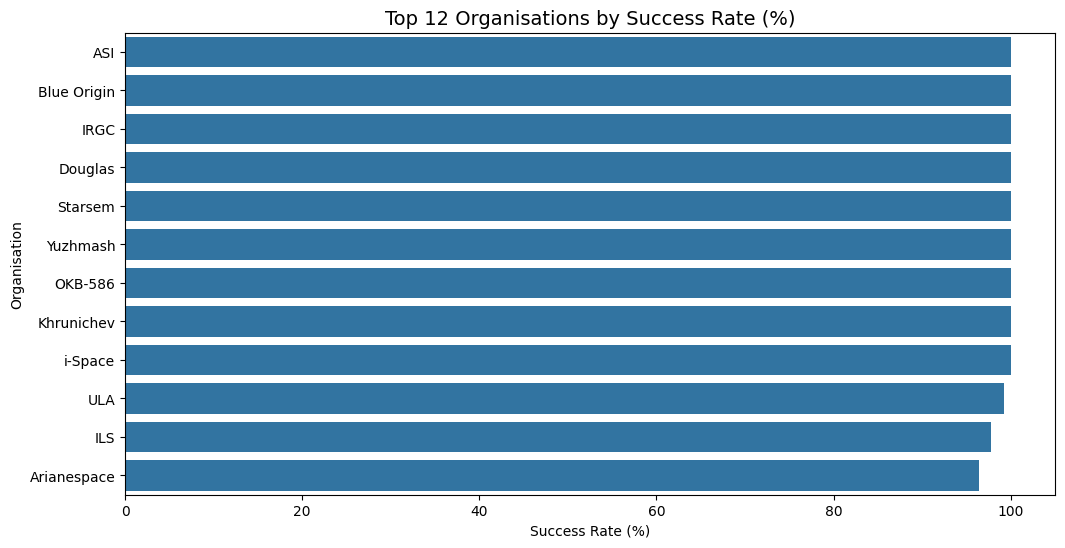

In [ ]:
# --- Q6: Organisations with Highest Success Rate ---
success_rate = df.groupby('Organisation')['Mission_Status'].apply(lambda x: (x=='Success').mean()*100)
success_rate = success_rate.sort_values(ascending=False).head(12)
plt.figure(figsize=(12,6))
sns.barplot(x=success_rate.values, y=success_rate.index)
plt.title("Top 12 Organisations by Success Rate (%)", fontsize=14)
plt.xlabel("Success Rate (%)")
plt.ylabel("Organisation")
plt.show()

# **🚀 GAURAV**


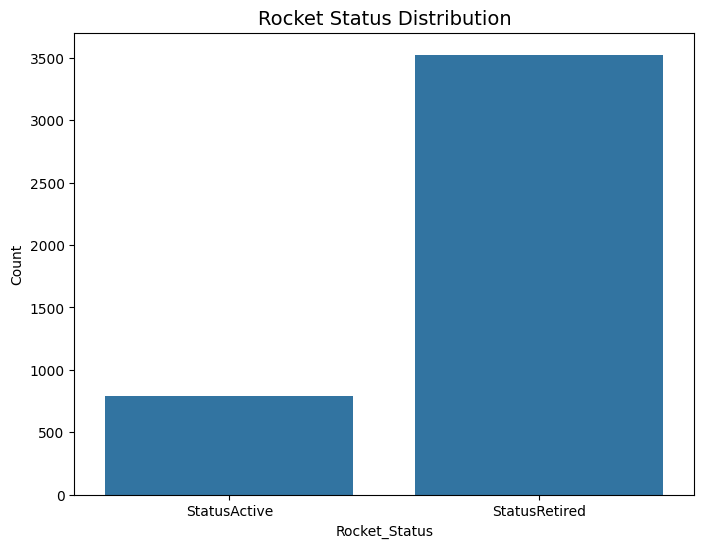

In [ ]:
# --- Q10: Active vs Retired Rockets ---
plt.figure(figsize=(8,6))
sns.countplot(x='Rocket_Status', data=df)
plt.title("Rocket Status Distribution", fontsize=14)
plt.ylabel("Count")
plt.show()

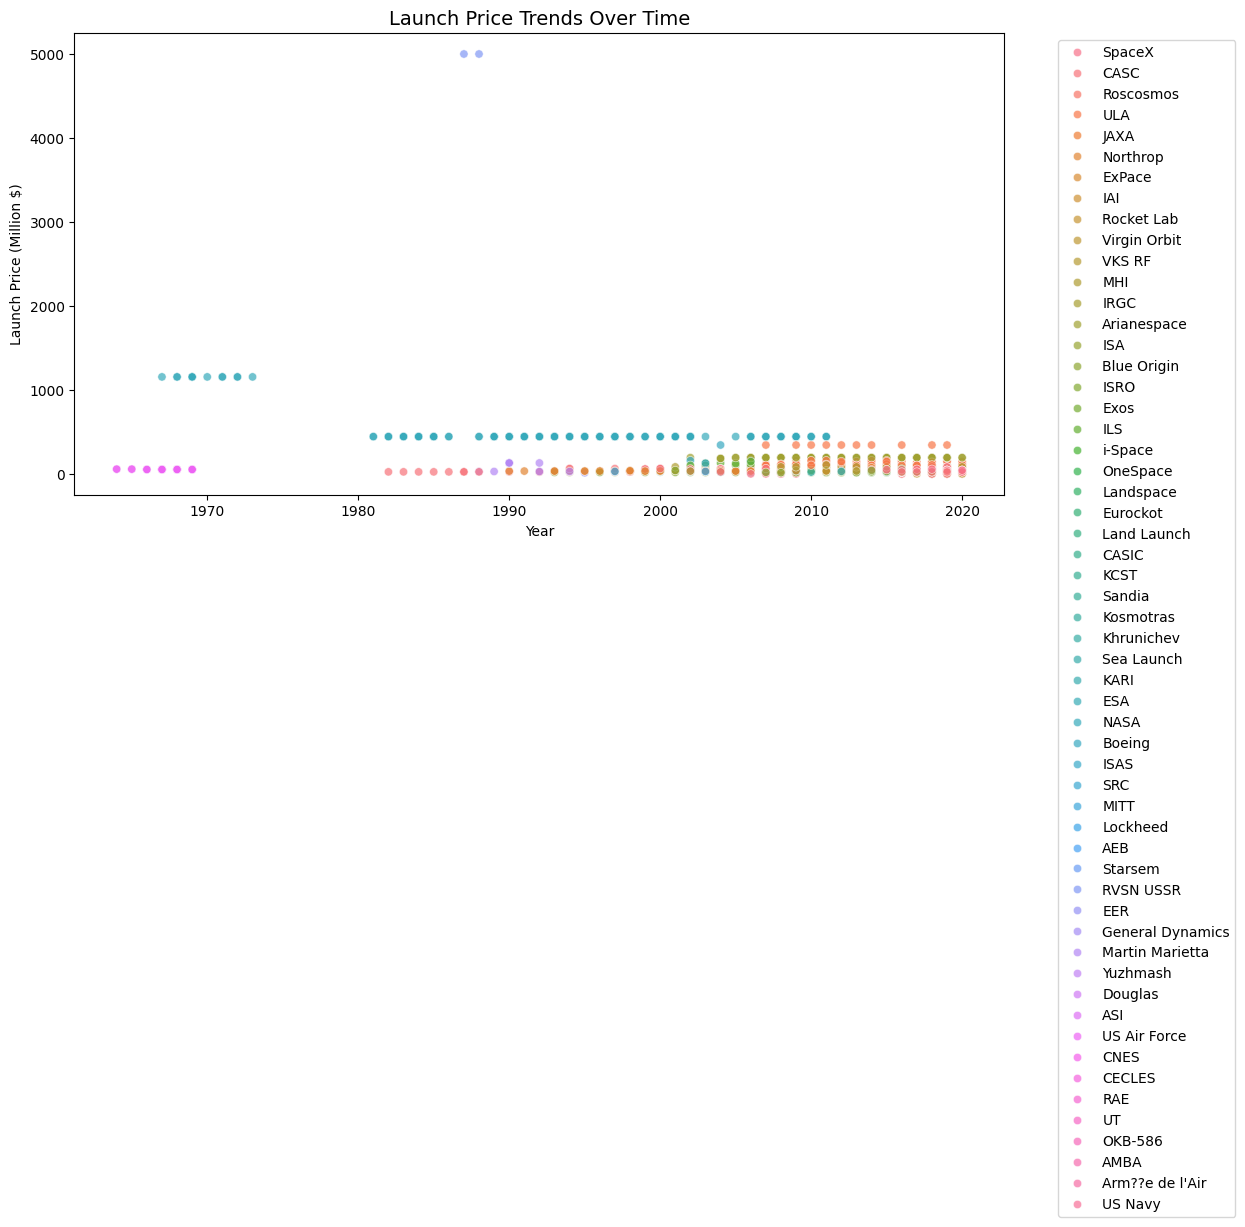

In [ ]:
# --- Q11: Average Launch Price by Organisation ---
plt.figure(figsize=(12,6))
sns.scatterplot(x="Year", y="Price", hue="Organisation", data=df, alpha=0.7)
plt.title("Launch Price Trends Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Launch Price (Million $)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# **🚀 SAMIDHA**

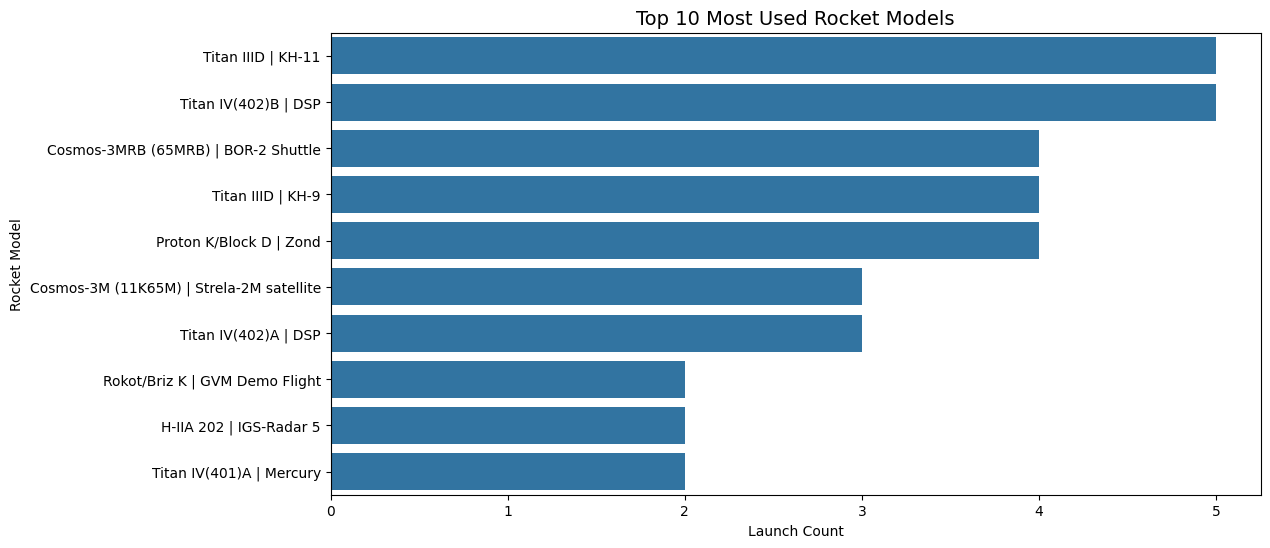

In [ ]:
# --- Q13: Most Used Rocket Models ---
plt.figure(figsize=(12,6))
sns.barplot(y=df['Rocket_Model'].value_counts().head(10).index,
            x=df['Rocket_Model'].value_counts().head(10).values)
plt.title("Top 10 Most Used Rocket Models", fontsize=14)
plt.xlabel("Launch Count")
plt.ylabel("Rocket Model")
plt.show()

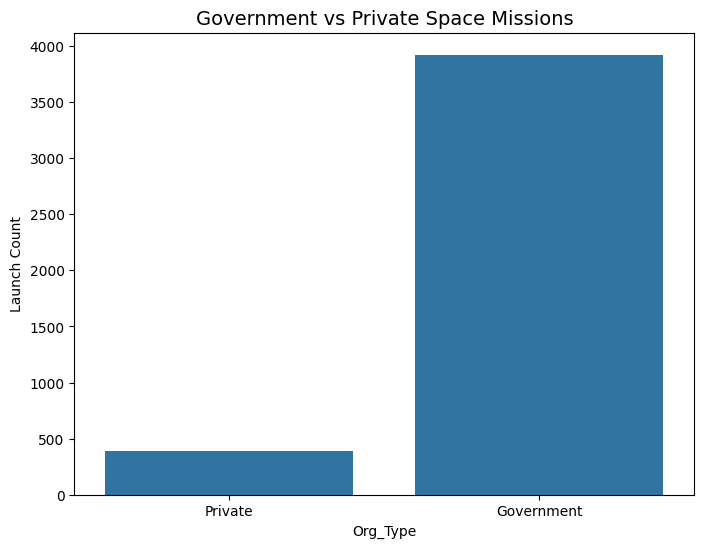

In [ ]:
# --- Q15: Government vs Private Missions ---
private_orgs = ["SpaceX", "Blue Origin", "Arianespace"]
df['Org_Type'] = df['Organisation'].apply(lambda x: "Private" if x in private_orgs else "Government")
plt.figure(figsize=(8,6))
sns.countplot(x='Org_Type', data=df)
plt.title("Government vs Private Space Missions", fontsize=14)
plt.ylabel("Launch Count")
plt.show()

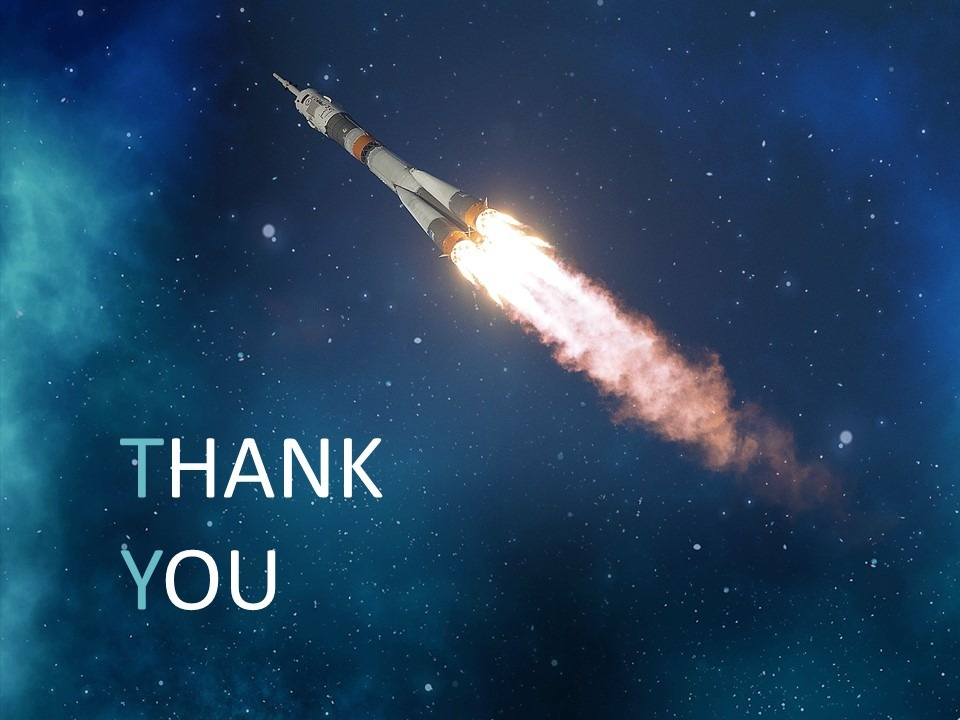